<a href="https://colab.research.google.com/github/sftSalman/tensoflowMaster/blob/main/Simple_custom_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
class Model(object):
  def __init__(self):
    self.w = tf.Variable(2.0)
    self.b = tf.Variable(3.0)

  def __call__(self,x):
    return self.w * x + self.b

In [3]:
model = Model()

In [13]:
def loss(pred_y,tar_y):
  return tf.reduce_mean(tf.square(pred_y-tar_y))

In [14]:
TRUE_w = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

xs  = tf.random.normal(shape=[NUM_EXAMPLES])

ys = (TRUE_w * xs) + TRUE_b

In [15]:
def plot_data(inputs,outputs, pred_outputs):
  real = plt.scatter(inputs,outputs,c='b',marker='.')
  predicted = plt.scatter(inputs,pred_outputs,c='r', marker = '.')
  plt.legend((real,predicted), ('Real Data', 'Predicted Data'))
  plt.show()


# def plot_data(inputs, outputs, predicted_outputs):
#   real = plt.scatter(inputs, outputs, c='b', marker='.')
#   predicted = plt.scatter(inputs, predicted_outputs, c='r', marker='+')
#   plt.legend((real,predicted), ('Real Data', 'Predicted Data'))
#   plt.show()

In [22]:
def plot_data(inputs, outputs, predicted_outputs):
  real = plt.scatter(inputs, outputs, c='b', marker='.')
  predicted = plt.scatter(inputs, predicted_outputs, c='r', marker='+')
  plt.legend((real,predicted), ('Real Data', 'Predicted Data'))
  plt.show()


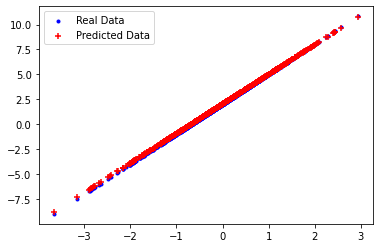

Current loss: 0.002546


In [23]:
plot_data(xs, ys, model(xs))
print('Current loss: %1.6f' % loss(model(xs), ys).numpy())

In [27]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dw, db = t.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

  return current_loss

In [28]:
model = Model()

# Collect the history of W-values and b-values to plot later
list_w, list_b = [], []
epochs = range(15)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, xs, ys, learning_rate=0.1)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' % 
        (epoch, list_w[-1], list_b[-1], current_loss))

Epoch  0: w=2.00 b=3.00, loss=1.99267
Epoch  1: w=2.20 b=2.80, loss=1.27754
Epoch  2: w=2.35 b=2.64, loss=0.81909
Epoch  3: w=2.48 b=2.51, loss=0.52518
Epoch  4: w=2.58 b=2.41, loss=0.33675
Epoch  5: w=2.66 b=2.32, loss=0.21594
Epoch  6: w=2.73 b=2.26, loss=0.13848
Epoch  7: w=2.78 b=2.21, loss=0.08881
Epoch  8: w=2.83 b=2.16, loss=0.05696
Epoch  9: w=2.86 b=2.13, loss=0.03653
Epoch 10: w=2.89 b=2.10, loss=0.02343
Epoch 11: w=2.91 b=2.08, loss=0.01503
Epoch 12: w=2.93 b=2.07, loss=0.00964
Epoch 13: w=2.94 b=2.05, loss=0.00618
Epoch 14: w=2.95 b=2.04, loss=0.00397


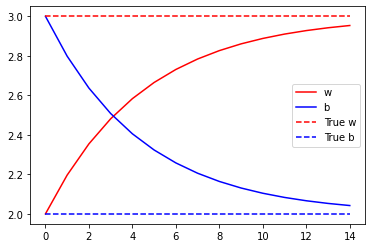

In [29]:
plt.plot(epochs, list_w, 'r',
       epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--',
      [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()

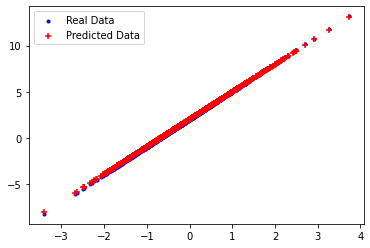

In [30]:
test_inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
test_outputs = test_inputs * TRUE_w + TRUE_b

predicted_test_outputs = model(test_inputs)
plot_data(test_inputs, test_outputs, predicted_test_outputs)


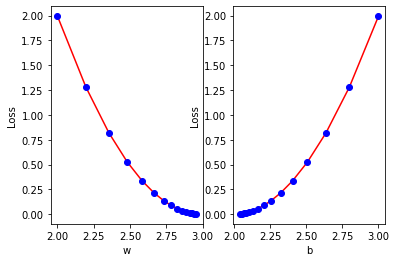

In [31]:
def plot_loss_for_weights(weights_list, losses):
  for idx, weights in enumerate(weights_list):
    plt.subplot(120 + idx + 1)
    plt.plot(weights['values'], losses, 'r')
    plt.plot(weights['values'], losses, 'bo')
    plt.xlabel(weights['name'])
    plt.ylabel('Loss')
    
    
weights_list = [{ 'name' : "w",
                  'values' : list_w
                },
                {
                  'name' : "b",
                  'values' : list_b
                }]

plot_loss_for_weights(weights_list, losses)